References: https://www.kaggle.com/sinakhorami/titanic-best-working-classifier

## Imports

In [1]:
# manipulating dataframes
import pandas as pd
import numpy as np

# visualizing libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Working with Numerical Data

***

## Load Titanic Dataset

In [2]:
titanic_train = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')
print(len(titanic_test))
full_dataset = [titanic_train, titanic_test]

418


In [3]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


***

## Explore and Visualize the Dataset

In [4]:
titanic_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c4e3668>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11c845a90>]], dtype=object)

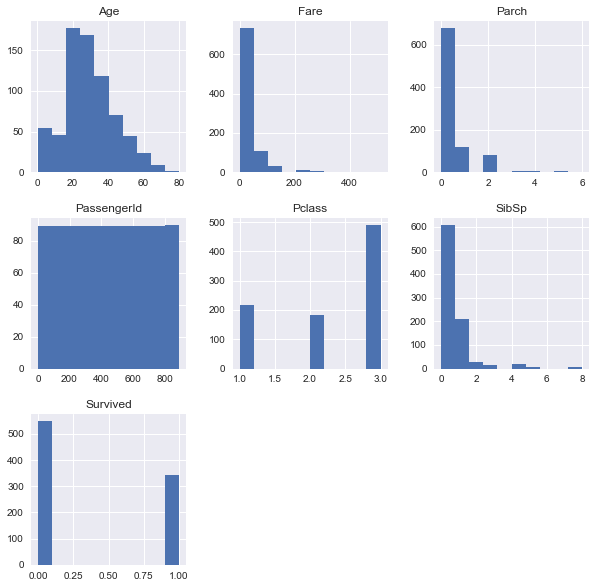

In [6]:
titanic_train.hist(figsize=(10,10))

***

## Check for Missing Values

In [7]:
titanic_train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [8]:
titanic_test.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

Looking at the value counts we see missing values for Age, Cabin, Embarked in the training set and one missing value for Fare in the test set. We can handle the missing values in several ways, the easiest is to drop the missing observations, but in this case we loose a lot of data, so we will handle the missing values by finding a logical way to impute the values. But before we proceed with handling the missing values, we will go over Feature Engineering.

***

## Feature Engineering

Here we proceed to create several new features, namely: 
- title: reflecting a persons title (Mr., Mrs. etc)
- mother: reflecting if a person is a mother or not
- sinlge: if someone is traveling alone
- minor/adult: reflecting if someone is a minor or an adult

In [9]:
def title(x):
    if 'Mr.' in x:
        return 'Mr'
    elif 'Mrs.' in x:
        return 'Mrs'
    elif 'Master' in x:
        return 'Master'
    elif 'Miss.' in x:
        return 'Miss'
    else:
        return 'Other'
    
def mother(df):
    if df['Sex'] == 'female' and df['Parch'] > 0 and df['Age'] > 18 and df['Title'] != 'Miss':
        return 'Mother'
    else:
        return 'Not Mother'

In [10]:
# feature for the title of each person
for dataset in full_dataset:
    dataset['Title'] = dataset.Name.apply(title)
titanic_train.Title.value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: Title, dtype: int64

In [11]:
# feature for the title of each person
for dataset in full_dataset:
    dataset['Mother'] = dataset.apply(mother, axis=1)
titanic_train.Mother.value_counts()

Not Mother    839
Mother         52
Name: Mother, dtype: int64

In [12]:
# feature for family size
for dataset in full_dataset:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
titanic_train.FamilySize.value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

In [13]:
# feature for whether someone is traveling alone
for dataset in full_dataset:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
titanic_train.IsAlone.value_counts()

1    537
0    354
Name: IsAlone, dtype: int64

***

## Handling Missing Values - Drop

In [14]:
titanic_drop_all_missing = titanic_train.dropna(how='any') # drop row if missing in any column
titanic_drop_all_missing.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Mother,FamilySize,IsAlone
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Not Mother,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Not Mother,2,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,Not Mother,1,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Miss,Not Mother,3,0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,Miss,Not Mother,1,1


In [15]:
titanic_drop_age_missing = titanic_train.dropna(subset = ['Age'], how='all') # drop row if missing in age column
titanic_drop_age_missing.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Mother,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Not Mother,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Not Mother,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Not Mother,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Not Mother,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Not Mother,1,1


In [16]:
titanic_drop_cabin_missing = titanic_train.dropna(subset = ['Cabin'], how='all') # drop row if missing in cabin column
titanic_drop_cabin_missing.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Mother,FamilySize,IsAlone
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Not Mother,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Not Mother,2,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,Not Mother,1,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Miss,Not Mother,3,0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,Miss,Not Mother,1,1


In [17]:
print('dropping only rows with a missing age value results in', len(titanic_drop_age_missing), 'total observations')
print('dropping only rows with a missing cabin value results in', len(titanic_drop_cabin_missing), 'total observations')
print('dropping any row with a missing value results in', len(titanic_drop_all_missing), 'total observations')

dropping only rows with a missing age value results in 714 total observations
dropping only rows with a missing cabin value results in 204 total observations
dropping any row with a missing value results in 183 total observations


## Handling Missing Values - Imputating Age

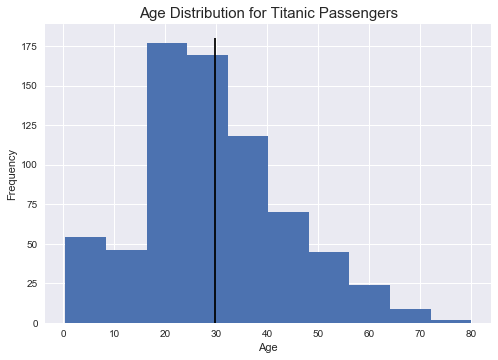

In [18]:
titanic_train.Age.hist()
plt.title('Age Distribution for Titanic Passengers', size=15)
plt.xlabel("Age")
plt.ylabel('Frequency')
plt.vlines(titanic_train.Age.mean(), 0, 180)
# plt.vlines(titanic_train.Age.median(), 0, 180)

In [19]:
titanic_train.groupby(['Pclass', 'Sex'])['Age'].mean()

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

In [20]:
titanic_train.groupby(['Pclass', 'Sex', 'Title'])['Age'].mean()

Pclass  Sex     Title 
1       female  Miss      30.000000
                Mrs       40.882353
                Other     33.666667
        male    Master     5.306667
                Mr        41.580460
                Other     48.727273
2       female  Miss      22.390625
                Mrs       33.682927
                Other     28.000000
        male    Master     2.258889
                Mr        32.768293
                Other     42.000000
3       female  Miss      16.123188
                Mrs       33.515152
        male    Master     5.350833
                Mr        28.724891
Name: Age, dtype: float64

In [21]:
def impute_age(dataset):
    for pclass in [1,2,3]:
        for sex in ['male','female']:
            for title in ['Miss', 'Mr', 'Master', 'Mrs', 'Other']:
                ds = dataset[dataset['Pclass'] == pclass]
                ds = ds[ds['Sex'] == sex]
                ds = ds[ds['Title'] == title]
                median = ds['Age'].median()
                dataset.loc[
                    (dataset['Age'].isnull()) &
                    (dataset['Pclass'] == pclass) &
                    (dataset['Title'] == title) &
                    (dataset['Sex'] == sex),
                    'Age'] = median

In [22]:
for dataset in full_dataset:
    impute_age(dataset)

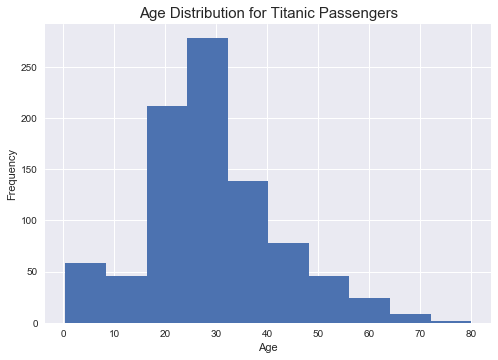

In [23]:
titanic_train.Age.hist()
plt.title('Age Distribution for Titanic Passengers', size=15)
plt.xlabel("Age")
plt.ylabel('Frequency')

## Another Feature

In [24]:
age_bins = [0,18,120]
age_labels = ['Minor', 'Adult']

for dataset in full_dataset:
    dataset['Child'] = pd.cut(dataset['Age'], age_bins, labels=age_labels)
titanic_train.Child.value_counts()

Adult    715
Minor    176
Name: Child, dtype: int64

## Handling Missing Values - Imputating Emarked (Mode)

In [25]:
titanic_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [26]:
for dataset in full_dataset:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

***

## Encoding Categorical Data

In [27]:
titanic_train.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
Title            object
Mother           object
FamilySize        int64
IsAlone           int64
Child          category
dtype: object

## Approach 1 (Find and Replace)

In [28]:
titanic_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [29]:
# using map function
for dataset in full_dataset:
    dataset['Sex'] = dataset['Sex'].map({'female': 0, 'male': 1}).astype(int)

In [30]:
titanic_train.Sex.value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [31]:
cleanup_nums = {'Child': {'Adult': 0, 'Minor': 1},
               'Mother': {'Mother':0, 'Not Mother':1}}

In [32]:
# using replace
for dataset in full_dataset:
    dataset.replace(cleanup_nums, inplace=True)

## Approach 2 (Label Encoding with Sklearn)

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
titanic_train.Title.value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: Title, dtype: int64

In [35]:
title_enc = LabelEncoder()
titanic_train['Title'] = title_enc.fit_transform(titanic_train['Title'].astype(str))
titanic_test['Title'] = title_enc.transform(titanic_test['Title'].astype(str))

In [36]:
titanic_train.Title.value_counts()

2    517
1    182
3    125
0     40
4     27
Name: Title, dtype: int64

## Approach 2 (Label Encoding with Pandas)

In [37]:
titanic_train.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [38]:
for dataset in full_dataset:
    dataset["Embarked"] = dataset["Embarked"].astype('category')
titanic_train.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex               int64
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked       category
Title             int64
Mother            int64
FamilySize        int64
IsAlone           int64
Child             int64
dtype: object

In [39]:
for dataset in full_dataset:
    dataset["Embarked"] = dataset["Embarked"].cat.codes
titanic_train.Embarked.value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64

## Approach 3  (OneHotEncoding with Pandas)

In [40]:
print('before OneHotEncoding:', titanic_train.shape)
titanic_train = pd.get_dummies(titanic_train, columns=['Title', 'FamilySize', 'Pclass', 'SibSp', 'Parch'])
print('after OneHotEncoding:', titanic_train.shape)

before OneHotEncoding: (891, 17)
after OneHotEncoding: (891, 43)


In [41]:
titanic_train.head()

,PassengerId,Survived,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Mother,...,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,1,0,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,NaN,2,1,...,0,0,0,1,0,0,0,0,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,71.2833,C85,0,1,...,0,0,0,1,0,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",0,26.0,STON/O2. 3101282,7.9250,NaN,2,1,...,0,0,0,1,0,0,0,0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,113803,53.1000,C123,2,1,...,0,0,0,1,0,0,0,0,0,0
4,5,0,"Allen, Mr. William Henry",1,35.0,373450,8.0500,NaN,2,1,...,0,0,0,1,0,0,0,0,0,0


In [42]:
titanic_test = pd.get_dummies(titanic_test, columns=[ 'Title', 'FamilySize', 'Pclass', 'SibSp', 'Parch'])

## Approach 3  (OneHotEncoding with Sklearn)

http://www.ritchieng.com/machinelearning-one-hot-encoding/

In [43]:
titanic_train['Embarked'].value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64

In [44]:
missing_cols = set( titanic_train.columns ) - set( titanic_test.columns )
for c in missing_cols:
    titanic_test[c] = 0
titanic_test = titanic_test[titanic_test.columns]

In [45]:
from sklearn.preprocessing import OneHotEncoder
embarked_enc = OneHotEncoder()
labels = embarked_enc.fit_transform(titanic_train['Embarked'].reshape(-1,1)).toarray()
embarked_enc.transform(titanic_test['Embarked'].reshape(-1,1))

/Users/snooravi/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()
/Users/snooravi/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


<418x3 sparse matrix of type '<class 'numpy.float64'>'
	with 418 stored elements in Compressed Sparse Row format>

In [46]:
titanic_train.Embarked.head(3)

0    2
1    0
2    2
Name: Embarked, dtype: int8

## Normalization Example

In [47]:
from sklearn import preprocessing
import numpy as np

X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]

In [48]:
X_normalized_l1 = preprocessing.normalize(X, norm='l1')

In [49]:
X_normalized_l1

array([[ 0.25, -0.25,  0.5 ],
       [ 1.  ,  0.  ,  0.  ],
       [ 0.  ,  0.5 , -0.5 ]])

In [50]:
# to calculate the first element in this matrix

X[0][0]/sum([np.abs(x) for x in X[0]])

0.25

In [51]:
X_normalized_l2 = preprocessing.normalize(X, norm='l2')

In [52]:
X_normalized_l2

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [53]:
# to calculate the first element in this matrix

X[0][0]/np.sqrt(sum([x**2 for x in X[0]]))

0.40824829046386307

## Standardization

In [54]:
# scaler = preprocessing.StandardScaler()
# X_metrics_scaled = scaler.fit_transform(X_new)

***